# Week 2: Car accident severity data load and exploration

In [200]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

In [201]:
#Loading our CSV file
df = pd.read_csv('Data-Collisions.csv')

C:\Users\Vishwas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
#Checking the overall structure of the dataset
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Week 3: Data analysis and visualization

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
#Getting onformation about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [204]:
#Checking the overall dataset
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


C:\Users\Vishwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


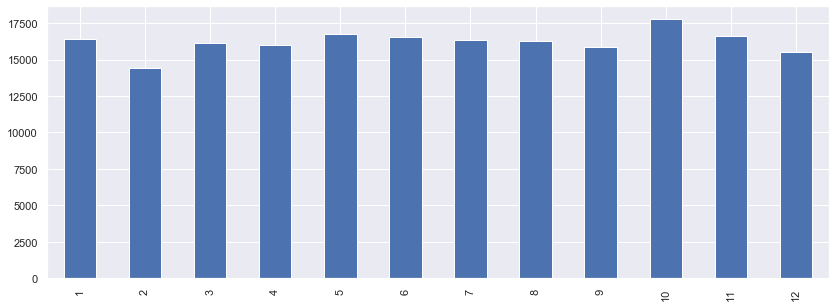

In [268]:
#Year wise car accident reports
plt.figure(figsize=(14,5))
time_x = pd.to_datetime(df['INCDTTM']).dt.month
time_x.value_counts().sort_index().plot("bar")

C:\Users\Vishwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


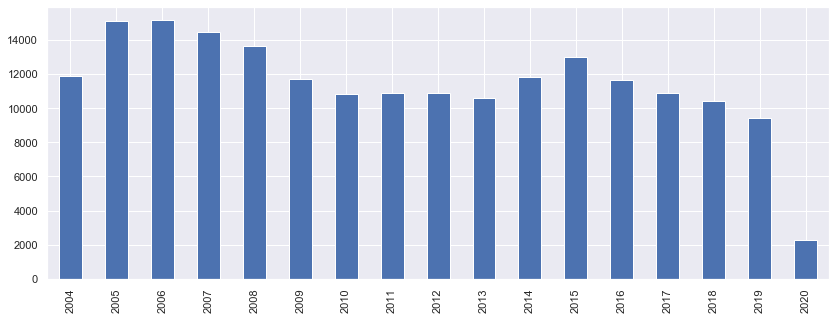

In [266]:
#Year wise car accident reports
plt.figure(figsize=(14,5))
time_x = pd.to_datetime(df['INCDTTM']).dt.year
time_x.value_counts().sort_index().plot("bar")

## Distribution of accidents over the day

C:\Users\Vishwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='area')` instead of `Series.plot('area',)`.
  """


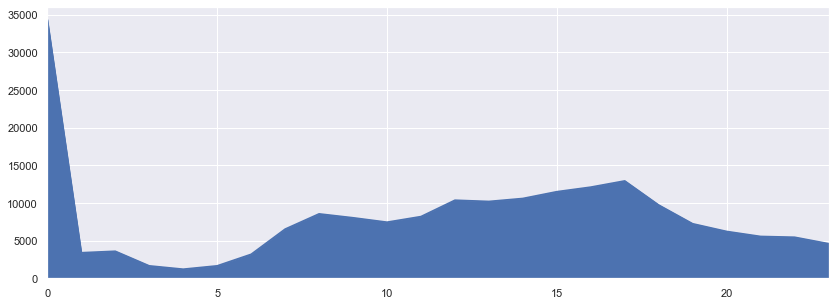

In [262]:
#Year wise car accident reports
#df['INCDTTM']=df['INCDTTM'].astype("datetime64")
plt.figure(figsize=(14,5))
time_x = pd.to_datetime(df['INCDTTM']).dt.hour
time_x.value_counts().sort_index().plot("area")

In [207]:
#Checking for null values
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [208]:
df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [209]:
#Analysing the target variable severity code
df['SEVERITYCODE'].unique()

array([2, 1], dtype=int64)

In [210]:
#Alternate method
np.unique(df['SEVERITYCODE'])

array([1, 2], dtype=int64)

In [211]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [212]:
df['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
85        1
54        1
49        1
87        1
43        1
Name: ST_COLCODE, Length: 115, dtype: int64

In [359]:
#Keeping only most frequent type of accident
col='ST_COLCODE'
n=5000
dfn=df[df.groupby(col)[col].transform('count').ge(n)]
#df.drop(df[df['ST_COLCODE']==60].index,inplace=True)

In [360]:
dfn['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
50     9089
14     8888
11     8636
28     6925
13     5363
Name: ST_COLCODE, dtype: int64

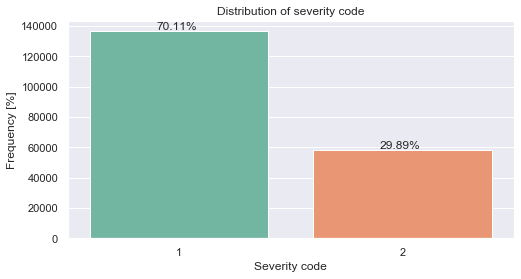

In [421]:
#Visualization for distribution of severity code
ax=sns.countplot(df['SEVERITYCODE'],palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.SEVERITYCODE)), (p.get_x()+ 0.3, p.get_height()+1000))

plt.title('Distribution of severity code',)
plt.xlabel('Severity code')
plt.ylabel('Frequency [%]')
plt.show()

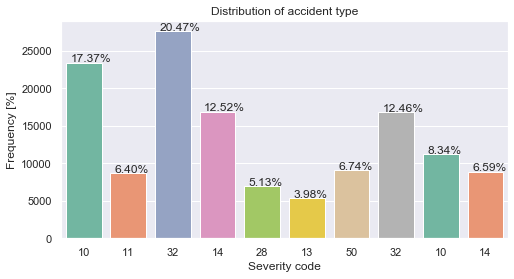

In [363]:
#Visualization for distribution of severity code
ax=sns.countplot(dfn['ST_COLCODE'],palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(dfn.SEVERITYCODE)), (p.get_x()+0.1, p.get_height()+100))

plt.title('Distribution of accident type',)
plt.xlabel('Severity code')
plt.ylabel('Frequency [%]')
plt.show()

In [364]:
dfn['LIGHTCOND'].value_counts()

Daylight                    79867
Dark - Street Lights On     34527
Unknown                     12256
Dusk                         4014
Dawn                         1709
Dark - No Street Lights      1179
Dark - Street Lights Off      897
Other                         193
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [365]:
dfn['ROADCOND'].value_counts()

Dry               86186
Wet               33336
Unknown           13422
Ice                 807
Snow/Slush          775
Other                96
Standing Water       79
Sand/Mud/Dirt        48
Oil                  36
Name: ROADCOND, dtype: int64

In [366]:
dfn['WEATHER'].value_counts()

Clear                       77107
Raining                     23121
Overcast                    19203
Unknown                     13382
Other                         684
Snowing                       673
Fog/Smog/Smoke                409
Sleet/Hail/Freezing Rain       78
Blowing Sand/Dirt              40
Severe Crosswind               21
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [367]:
dfn['VEHCOUNT'].value_counts()

2     112309
3      11205
1       8606
4       2114
5        455
6        128
7         35
8         13
9          8
11         3
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [368]:
dfn['COLLISIONTYPE'].value_counts()

Parked Car    44421
Angles        34674
Rear Ended    31134
Other          9089
Sideswipe      8636
Left Turn      6925
Name: COLLISIONTYPE, dtype: int64

In [369]:
dfn.drop(['X','Y','STATUS','INCKEY','COLDETKEY','REPORTNO','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','PEDCYLCOUNT','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','WEATHER','LIGHTCOND','SDOTCOLNUM','SEGLANEKEY','CROSSWALKKEY','SEVERITYCODE.1','PEDROWNOTGRNT','SPEEDING','INATTENTIONIND'],axis=1,inplace=True)

C:\Users\Vishwas\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [370]:
dfn.set_index('OBJECTID',inplace=True)

In [371]:
dfn.drop([],axis=1,inplace=True)

In [372]:
dfn.count()

SEVERITYCODE     134879
ADDRTYPE         133320
SEVERITYDESC     134879
COLLISIONTYPE    134879
PERSONCOUNT      134879
PEDCOUNT         134879
VEHCOUNT         134879
JUNCTIONTYPE     129351
UNDERINFL        134879
ROADCOND         134785
ST_COLCODE       134879
ST_COLDESC       134879
HITPARKEDCAR     134879
dtype: int64

In [373]:
dfn.dropna(axis=0,inplace=True)

C:\Users\Vishwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
dfn.describe(include='all')

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,ROADCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,129029.000000,129029,129029,129029,129029.000000,129029.000000,129029.000000,129029,129029,129029,129029,129029,129029
unique,NaN,3,2,6,NaN,NaN,NaN,7,4,9,10,7,2
top,NaN,Block,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,Mid-Block (not related to intersection),N,Dry,32,One parked--one moving,N
freq,NaN,86505,93496,39708,NaN,NaN,NaN,64897,71913,84424,24183,39708,123438
mean,1.275388,NaN,NaN,NaN,2.490890,0.001597,2.072054,NaN,NaN,NaN,NaN,NaN,NaN
std,0.446711,NaN,NaN,NaN,1.333413,0.046723,0.523653,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,3.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation matrix

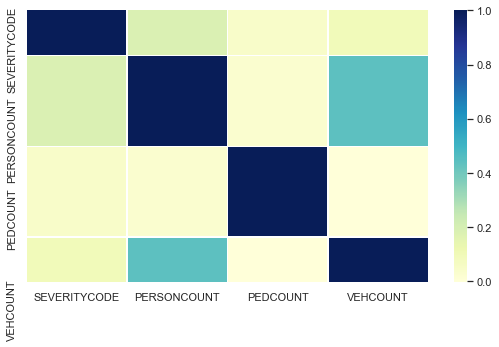

In [375]:
plt.figure(figsize=(9,5))
sns.heatmap(dfn.corr(),linewidths=.5,cmap="YlGnBu")
plt.show()

Min: 1 
Max: 12 
Median: 2.0


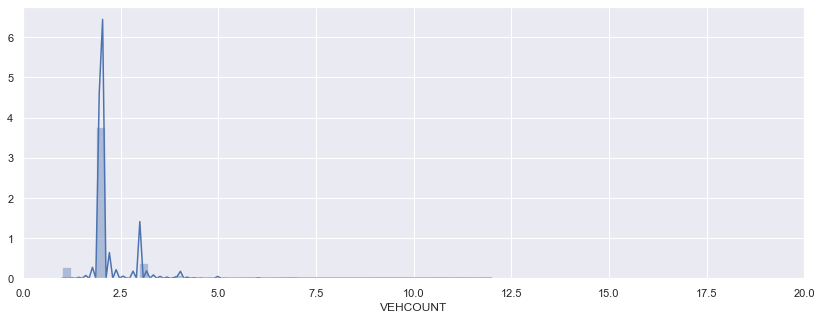

In [376]:
plt.figure(figsize=(14,5))
sns.distplot(dfn.VEHCOUNT).set_xlim(0,20)
print('Min:',    dfn.VEHCOUNT.min(), '\n'
      'Max:',    dfn.VEHCOUNT.max(), '\n'
      'Median:', dfn.VEHCOUNT.median())

In [377]:
from sklearn.model_selection import train_test_split as split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [378]:
# Assigning our dataframe to x and y
x=dfn.drop(['SEVERITYCODE'],axis=1)
y=dfn.SEVERITYCODE
print(x.head)
print(y.head)

<bound method NDFrame.head of               ADDRTYPE                    SEVERITYDESC COLLISIONTYPE  \
OBJECTID                                                               
1         Intersection                Injury Collision        Angles   
2                Block  Property Damage Only Collision     Sideswipe   
3                Block  Property Damage Only Collision    Parked Car   
5         Intersection                Injury Collision        Angles   
6         Intersection  Property Damage Only Collision        Angles   
...                ...                             ...           ...   
219539           Block                Injury Collision        Angles   
219541           Block  Property Damage Only Collision         Other   
219544           Block  Property Damage Only Collision    Rear Ended   
219545    Intersection                Injury Collision     Left Turn   
219547           Block  Property Damage Only Collision    Rear Ended   

          PERSONCOUNT  PEDCOUNT  

### Checking out the number of labels

In [379]:
for col in x.columns:
    print(col,': ',len(x[col].unique()), ' labels')

ADDRTYPE :  3  labels
SEVERITYDESC :  2  labels
COLLISIONTYPE :  6  labels
PERSONCOUNT :  40  labels
PEDCOUNT :  5  labels
VEHCOUNT :  12  labels
JUNCTIONTYPE :  7  labels
UNDERINFL :  4  labels
ROADCOND :  9  labels
ST_COLCODE :  10  labels
ST_COLDESC :  7  labels
HITPARKEDCAR :  2  labels


In [383]:
x= pd.get_dummies(x,columns=['ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PEDCOUNT','JUNCTIONTYPE','UNDERINFL','ROADCOND','ST_COLCODE','ST_COLDESC','HITPARKEDCAR'],drop_first = True)

In [384]:
#Reducing the number of personcount to only top10
top_10 = [x for x in dfn.PERSONCOUNT.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    x[label] = np.where(x['PERSONCOUNT']==label,1,0)

In [385]:
#Reducing vehiclecount to top5
top_5 = [x for x in dfn.VEHCOUNT.value_counts().sort_values(ascending=False).head(5).index]
for label in top_5:
    x[label] = np.where(x['VEHCOUNT']==label,1,0)

In [386]:
x.drop(['PERSONCOUNT','VEHCOUNT'],inplace=True,axis=1)

In [387]:
#Checking out our feature matrix
x.head()

,2,3,4,1,5,0,6,7,8,9,...,ST_COLCODE_28,ST_COLCODE_32,ST_COLCODE_50,ST_COLDESC_Fixed object,ST_COLDESC_From opposite direction - one left turn - one straight,ST_COLDESC_From same direction - both going straight - both moving - rear-end,ST_COLDESC_From same direction - both going straight - both moving - sideswipe,ST_COLDESC_From same direction - both going straight - one stopped - rear-end,ST_COLDESC_One parked--one moving,HITPARKEDCAR_Y
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
x_train, x_test, y_train, y_test = split(x, y,test_size=0.2)

## 1. Logistic regression

In [411]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier

In [412]:
LR = LogisticRegression(class_weight = "balanced")
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(classification_report(y_test,y_pred))

C:\Users\Vishwas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18690
           2       1.00      1.00      1.00      7116

    accuracy                           1.00     25806
   macro avg       1.00      1.00      1.00     25806
weighted avg       1.00      1.00      1.00     25806



In [413]:
print("Jaccard score: ", jaccard_similarity_score(y_test,y_pred))
print("Logloss score: ", log_loss(y_test,y_pred))
print("DT F1-score: %.2f" % f1_score(y_test, y_pred, average='weighted') )

Jaccard score:  1.0
Logloss score:  25.015293935396844
DT F1-score: 1.00


C:\Users\Vishwas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## 2.Decision tree classifier

In [414]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(x_train,y_train)
y_pred=Tree.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18690
           2       1.00      1.00      1.00      7116

    accuracy                           1.00     25806
   macro avg       1.00      1.00      1.00     25806
weighted avg       1.00      1.00      1.00     25806



## 3.Randomforest classifier

In [419]:
clf = RandomForestClassifier(n_estimators=2, n_jobs=3)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18690
           2       1.00      1.00      1.00      7116

    accuracy                           1.00     25806
   macro avg       1.00      1.00      1.00     25806
weighted avg       1.00      1.00      1.00     25806



In [420]:
print("Jaccard score: ", jaccard_similarity_score(y_test,y_pred))
print("Logloss score: ", log_loss(y_test,y_pred))
print("DT F1-score: %.2f" % f1_score(y_test, y_pred, average='weighted') )

Jaccard score:  0.9991087344028521
Logloss score:  25.015293935396844
DT F1-score: 1.00


C:\Users\Vishwas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
